<a href="https://colab.research.google.com/github/Rishikesh802/Netflix-Movie-Recommendation-System/blob/main/Netflix_movie_reccomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.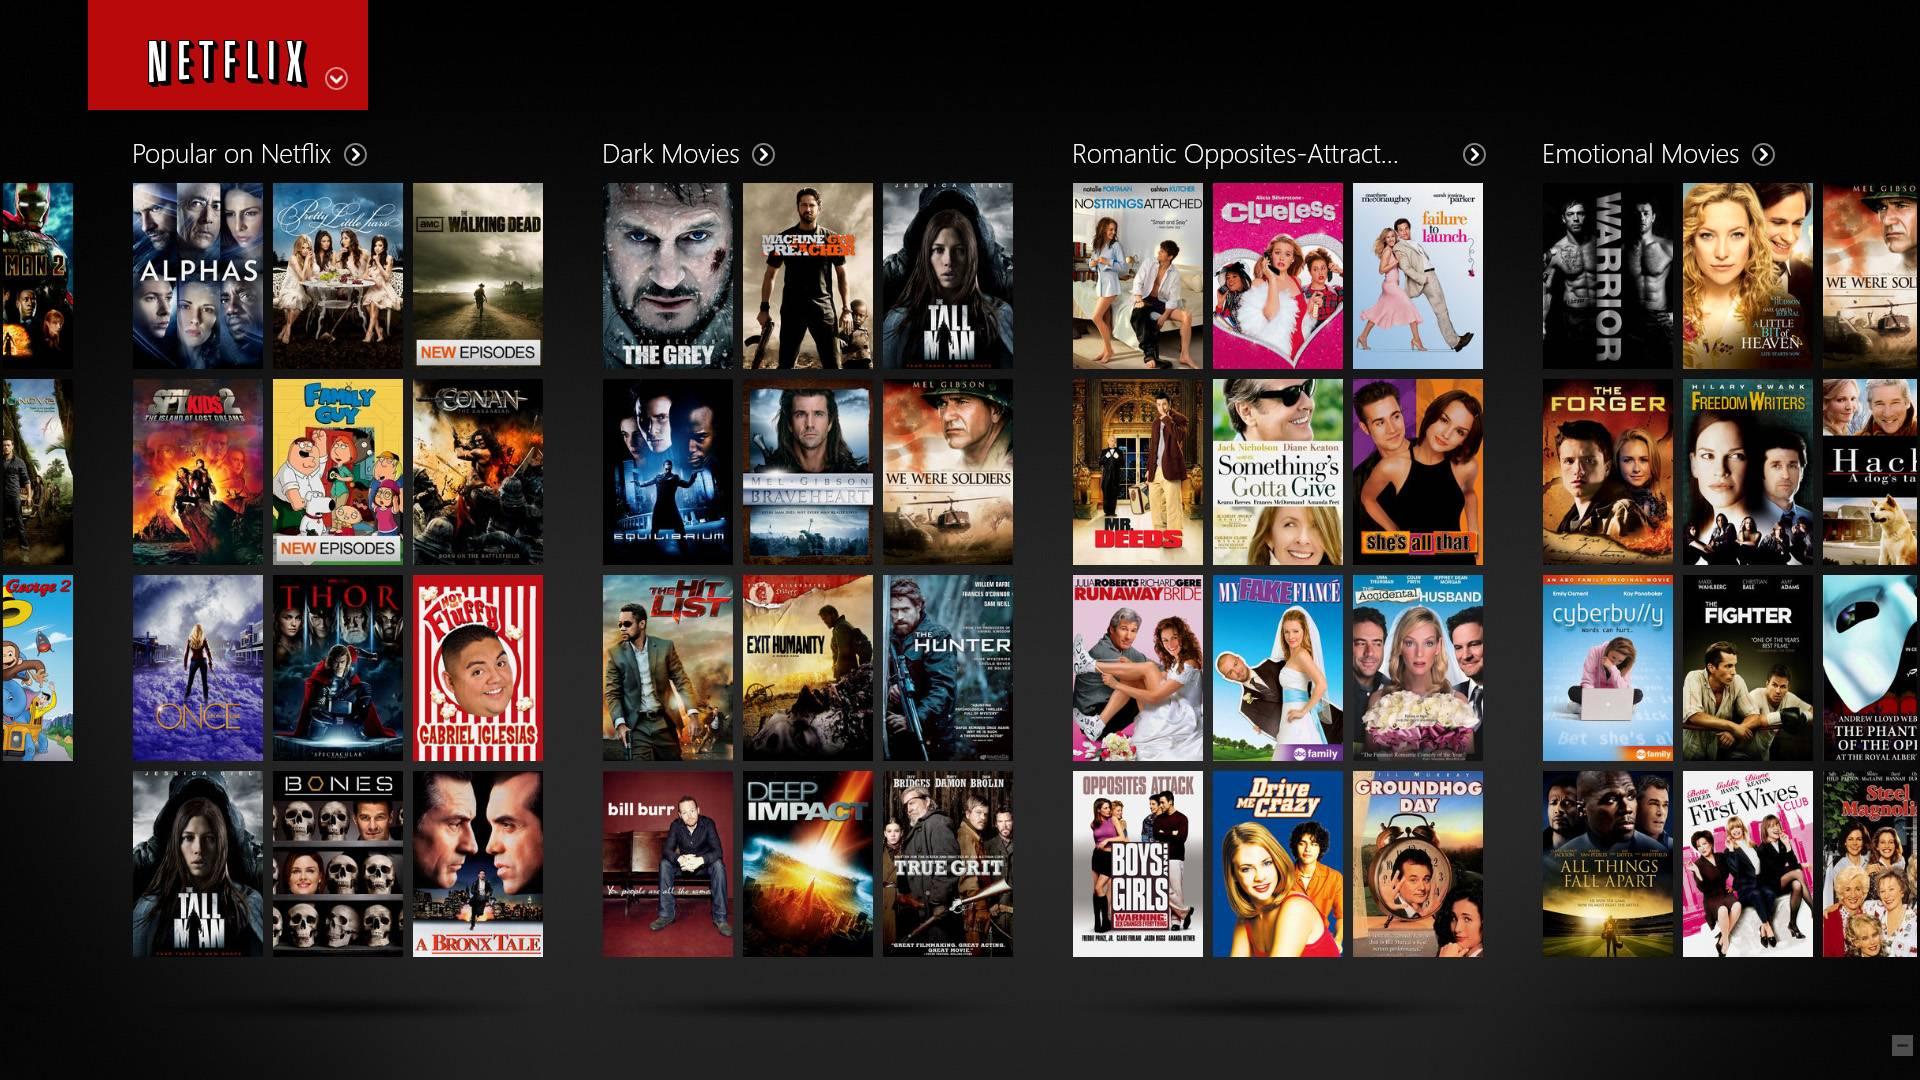


# In this project, you are required to do

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent
   years.

3. Clustering similar content by matching text-based features


#Attribute Information

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings

In [ ]:
netflix_data = pd.read_csv('/content/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_data.shape

(7787, 12)

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


The data has 7787 rows and 12 columns.



In [ ]:
netflix_data.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# unique values in each column

netflix_data.nunique()


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
#looking for any duplicates in dataset

len(netflix_data[netflix_data.duplicated()])


0

Do not have any duplicates in dataset.


In [ ]:
#sum of all null values for each features

netflix_data.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Several features in dataset have null values.

So to handel those null values in better way, lets look for percentage of null values in dataset.

In [ ]:
#percentage of all null values for each features

netflix_data.isnull().sum()/netflix_data.shape[0]*100


show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

We can remove director  column as because it has more missing values and this will affect other features.

Country feature have 6.51% of null values.
Filling null values by mode of feature.

Rating feature have 0.09% of null values.
Filling null values by mode of feature

Date_added feature have 0.12% of null values.
Droping rows corresponding to this null values

In [ ]:

netflix_data['country'].fillna(netflix_data['country'].mode()[0], inplace=True)

netflix_data['rating'].fillna(netflix_data['rating'].mode()[0], inplace=True)

netflix_data['cast'].fillna('Unknown', inplace=True)

netflix_data.dropna(subset=['date_added'], inplace=True)

netflix_data=netflix_data.drop(['director'],axis=1)


In [ ]:
#final check for null value
netflix_data.isnull().sum()/netflix_data.shape[0]*100


show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [ ]:
# Information about all the features of dataset

netflix_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   cast          7777 non-null   object
 4   country       7777 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   object
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
dtypes: int64(1), object(10)
memory usage: 729.1+ KB


Date_added feature have object datatype.

Converting to datetime datatype from object datatype.

In [ ]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])


Duration feature have object datatype.

Converting to int datatype from object datatype

### We will add new features based on date_added



In [ ]:
netflix_data['date_added']=pd.to_datetime(netflix_data['date_added'])
netflix_data['year_added']=netflix_data['date_added'].dt.year
netflix_data['month_added']=netflix_data['date_added'].dt.month

In [ ]:
netflix_data['duration']


0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7777, dtype: object

Duration are in combination of int values and string.

Removing string part so as to get int datatype.

In [ ]:
#spliting each values by space and selecting int part at zeroth index

netflix_data['duration'] = netflix_data['duration'].apply(lambda x : x.split(" ")[0])

In [ ]:
#check for updated duration values

netflix_data['duration']


0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: object

In [ ]:
# We will create new feature for Genre and add data by spliting from listed_in feature

netflix_data['genre']=netflix_data['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))


In [ ]:
netflix_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   cast          7777 non-null   object        
 4   country       7777 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   object        
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
 11  year_added    7777 non-null   int64         
 12  month_added   7777 non-null   int64         
 13  genre         7777 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 911.4+ KB


Now all the features and thier values are in required datatypes and formats.


# EDA :- Exploratory Data Analysis

 Number of Movies vs TV Shows

There are more Movies on Netflix than TV shows.


<ipython-input-69-b7ca19119be7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data= netflix_data, palette="Set2")


<Axes: xlabel='type', ylabel='count'>

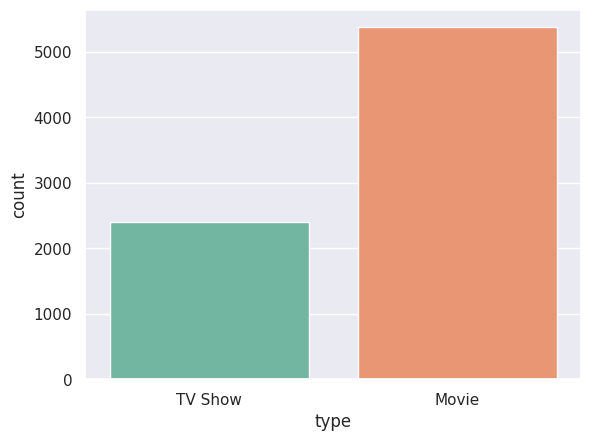

In [ ]:
sns.set(style="darkgrid")
sns.countplot(x="type", data= netflix_data, palette="Set2")

Movies uploaded on Netflix are more than twice the TV Shows uploaded.

This dose not implies that movies are more indulging that of TV Shows.

Beacuase TV shows may have several seasons which consits of number of episodes.

Duration of TV shows are much more that of movies.


#### Movies & TV Shows Ratings analysis

<ipython-input-70-b335828ebbd2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])


<Axes: xlabel='rating', ylabel='count'>

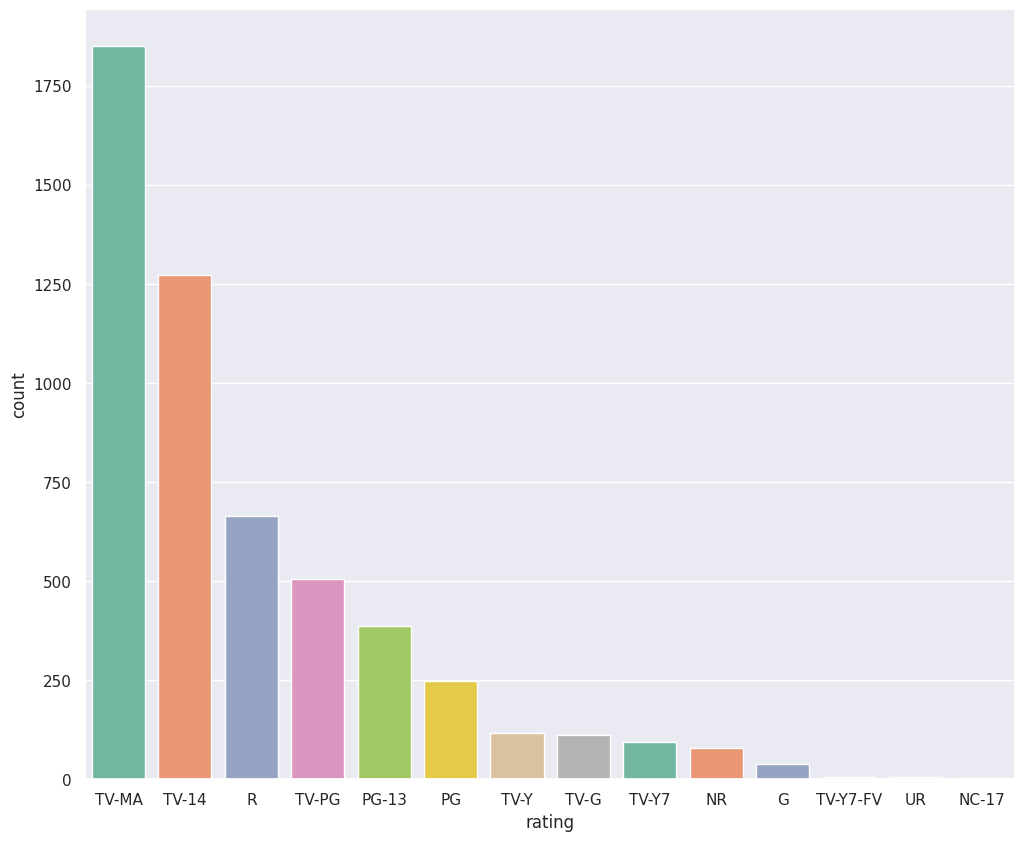

In [ ]:
movie_df = netflix_data[netflix_data['type'] == 'Movie']


#MOVIES RATINGS
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

1) The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

2) Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

3) Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

<ipython-input-71-57e743f0fe99>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])


<Axes: xlabel='rating', ylabel='count'>

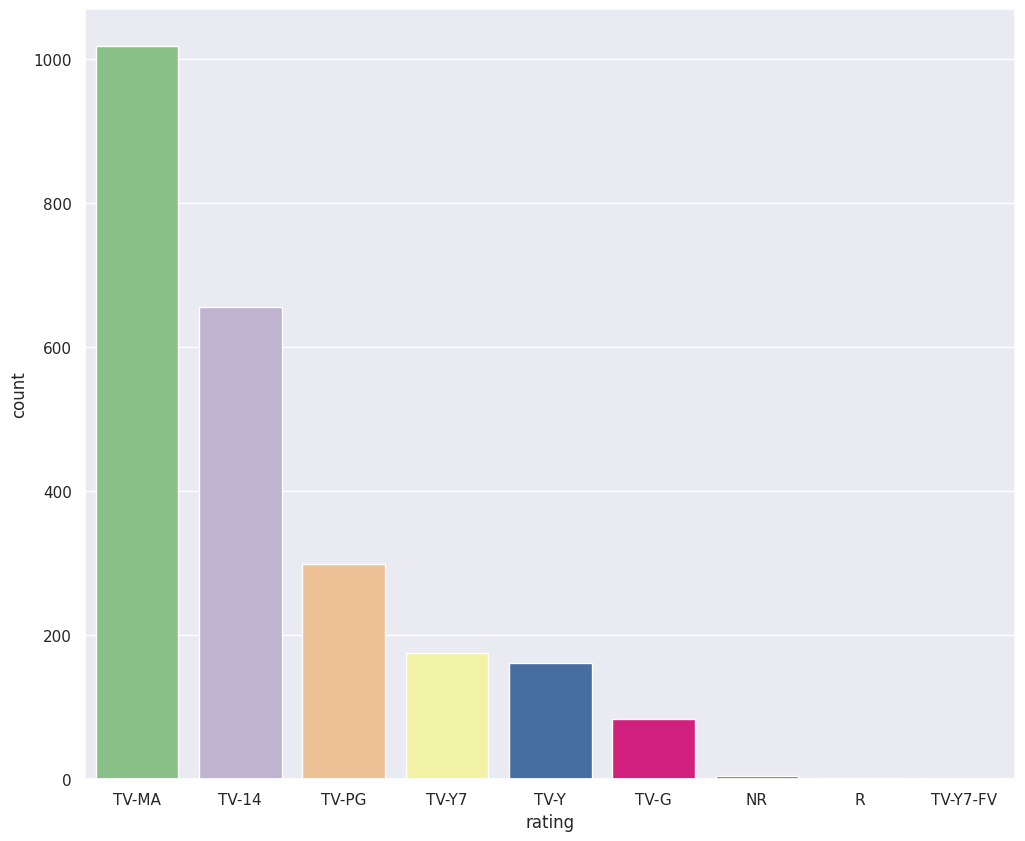

In [ ]:
tv_df = netflix_data[netflix_data['type'] == 'TV Show']

# TV SHOWS RATINGS
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

1)Most of the TV Shows has 'TV-14' ratings which stands for the content can be inappropriate for children under 14 years of age.

2)Second highest count of ratings in TV Shows is 'TV-MA', for which the content is for matured audience only.

3)TV Shows has least amount of counts with 'R' ratings.

#### Yearly Analysis of content

<Axes: xlabel='count', ylabel='release_year'>

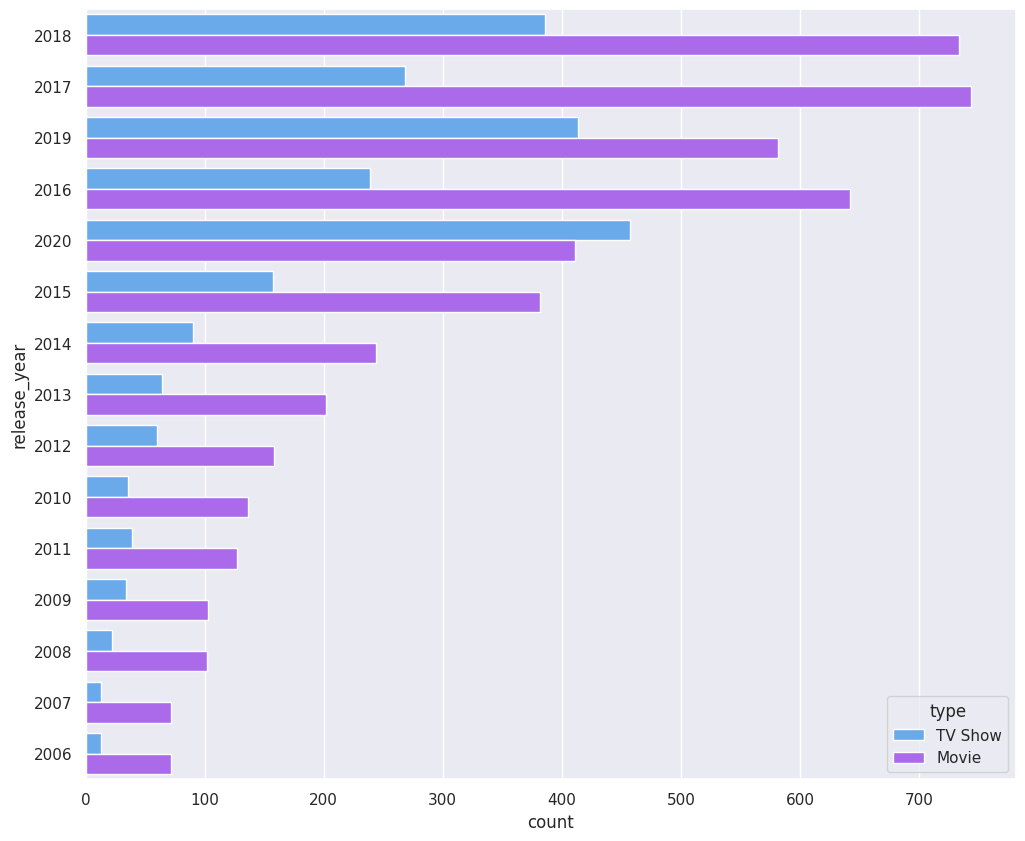

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y="release_year", data= netflix_data, palette="cool", order= netflix_data['release_year'].value_counts().index[0:15],hue=netflix_data['type'])

1) We can see that Netflix released most number of content in year 2017.

2) Noticeable growth in releasing content can be seen from the year 2015.

### Analysis of TV Shows with most number of seasons

In [ ]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

<ipython-input-73-568e98801f68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['duration']=tv_df['duration'].str.replace(' Season','')
<ipython-input-73-568e98801f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['duration']=tv_df['duration'].str.replace('s','')
<ipython-input-73-568e98801f68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2400, dtype: int64

In [ ]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [ ]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
2678,Heartland,11
1300,Cheers,11
1597,Danger Mouse: Classic Collection,10
5538,Shameless (U.S.),10


<Axes: xlabel='title'>

<Figure size 1000x600 with 0 Axes>

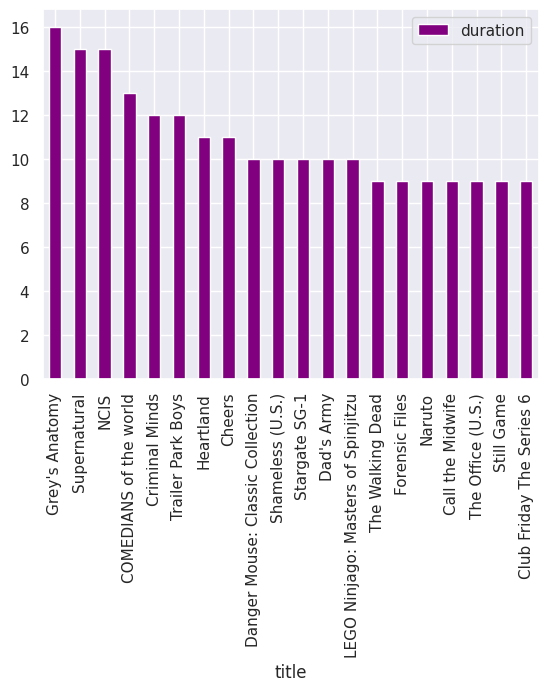

In [ ]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar',x='title',y='duration', color='purple')

Grey's Anatomy and NCIS has highest number of seasons

### Countries on top for movies content creation

In [ ]:
netflix_data['country_main'] = netflix_data['country'].apply(lambda x: x.split(",")[0])


<ipython-input-78-dc820d89a786>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="country_main", data=netflix_data, palette="Accent", order=netflix_data['country_main'].value_counts().index[0:15])


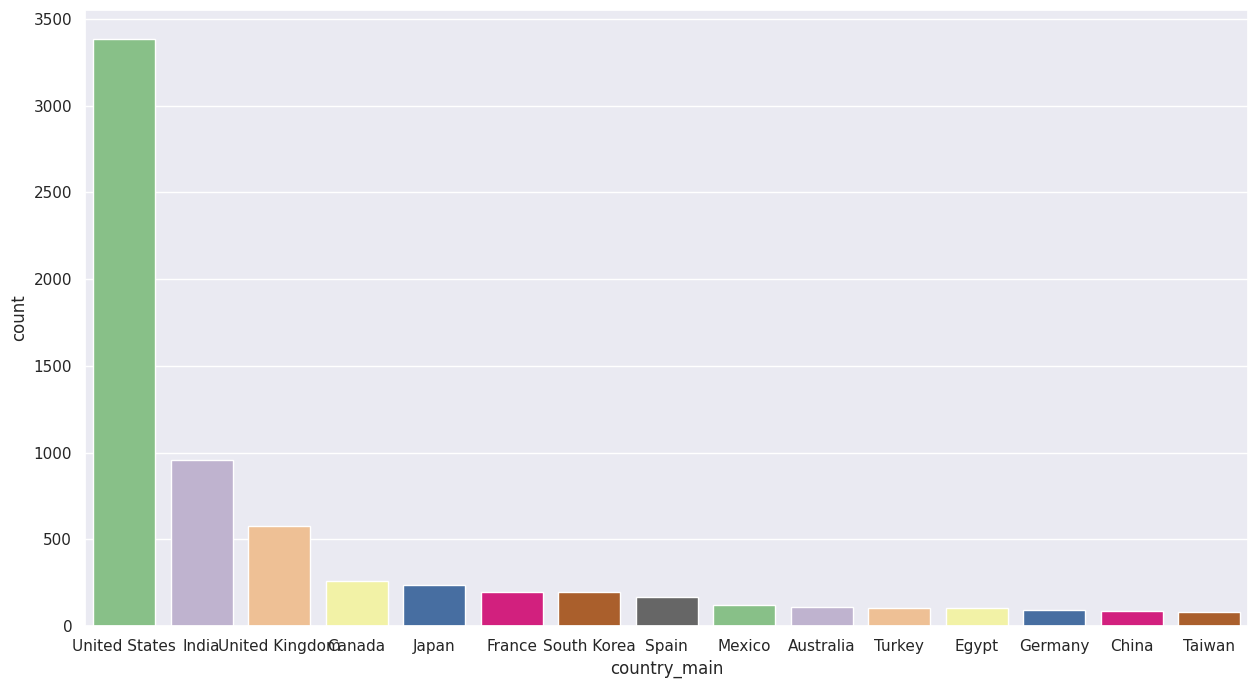

In [ ]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.countplot(x="country_main", data=netflix_data, palette="Accent", order=netflix_data['country_main'].value_counts().index[0:15])
plt.show()

:United States creates highest amount of movies followed by India and UK.

### Most Popular Genre on Netflix

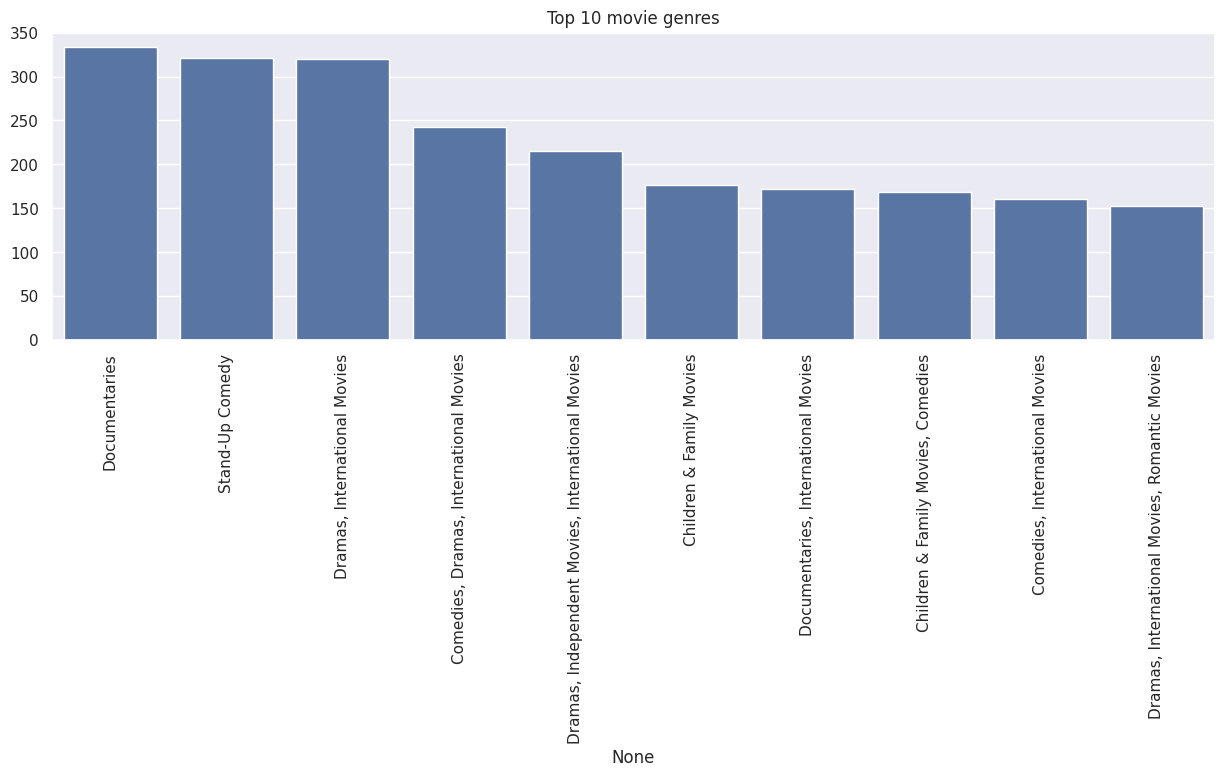

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(x=movie_df['listed_in'].value_counts().head(10).index,y=movie_df['listed_in'].value_counts().head(10).values)
plt.title('Top 10 movie genres')
plt.xticks(rotation=90)
plt.show()

Documentaries, Stand-Up Comedy hit all over the world.

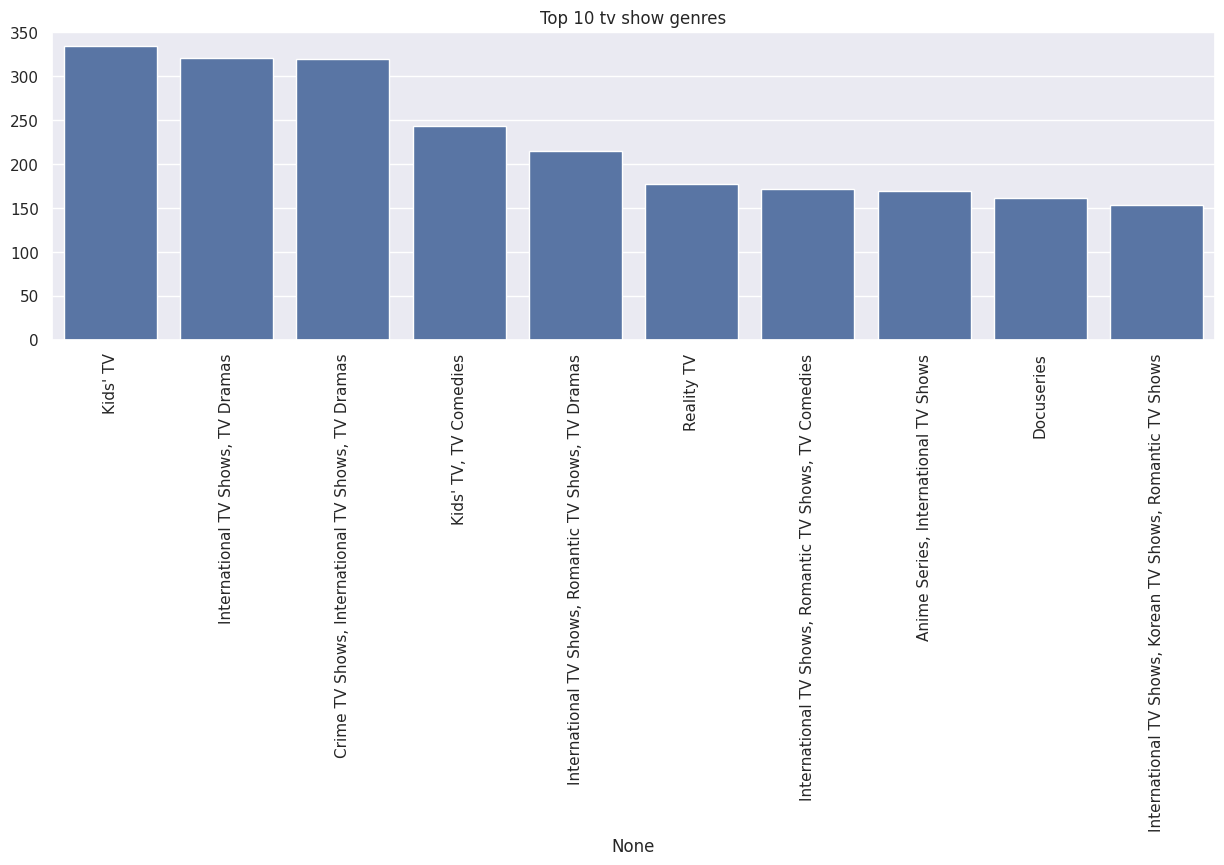

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(x=tv_df['listed_in'].value_counts().head(10).index,y=movie_df['listed_in'].value_counts().head(10).values)
plt.title('Top 10 tv show genres')
plt.xticks(rotation=90)
plt.show()

# Text Preprocessing



In [ ]:
netflix_data.head(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre,country_main
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,"[International TV Shows, TV Dramas, TV Sci-Fi ...",Brazil
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,"[Dramas, International Movies]",Mexico
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,"[Horror Movies, International Movies]",Singapore
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,"[Action & Adventure, Independent Movies, Sci-F...",United States
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,[Dramas],United States


In [ ]:
# Feature Engineering
# Combine relevant text features

netflix_data['text_features'] = netflix_data['description'] + ' ' + netflix_data['listed_in'] + ' ' + netflix_data['country'] + ' '+netflix_data['cast']


In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
netflix_data.listed_in=netflix_data.listed_in.str.split(',').tolist()


In [ ]:
netflix_data.columns


Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'genre', 'country_main', 'text_features'],
      dtype='object')

In [ ]:
netflix_data.head(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre,country_main,text_features
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,2020,8,"[International TV Shows, TV Dramas, TV Sci-Fi ...",Brazil,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,2016,12,"[Dramas, International Movies]",Mexico,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",2018,12,"[Horror Movies, International Movies]",Singapore,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi...",2017,11,"[Action & Adventure, Independent Movies, Sci-F...",United States,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,[Dramas],A brilliant group of students become card-coun...,2020,1,[Dramas],United States,A brilliant group of students become card-coun...


In [ ]:
print(netflix_data['listed_in'].dtype)
print(netflix_data['country'].dtype)
print(netflix_data['cast'].dtype)


object
object
object


In [ ]:
netflix_data['listed_in'] = netflix_data['listed_in'].astype(str)
netflix_data['country'] = netflix_data['country'].astype(str)
netflix_data['cast'] = netflix_data['cast'].astype(str)


In [ ]:
netflix_data['cast'] = netflix_data['cast'].apply(lambda x: ', '.join(x.split(',')) if isinstance(x, str) else '')
netflix_data['listed_in'] = netflix_data['listed_in'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
netflix_data['country'] = netflix_data['country'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))



In [ ]:
netflix_data.head(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre,country_main,text_features
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes,...",Brazil,2020-08-14,2020,TV-MA,4,"['International TV Shows', ' TV Dramas', ' TV ...",In a future where the elite inhabit an island ...,2020,8,"[International TV Shows, TV Dramas, TV Sci-Fi ...",Brazil,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,2016,TV-MA,93,"['Dramas', ' International Movies']",After a devastating earthquake hits Mexico Cit...,2016,12,"[Dramas, International Movies]",Mexico,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawren...",Singapore,2018-12-20,2011,R,78,"['Horror Movies', ' International Movies']","When an army recruit is found dead, his fellow...",2018,12,"[Horror Movies, International Movies]",Singapore,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connel...",United States,2017-11-16,2009,PG-13,80,"['Action & Adventure', ' Independent Movies', ...","In a postapocalyptic world, rag-doll robots hi...",2017,11,"[Action & Adventure, Independent Movies, Sci-F...",United States,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,2020-01-01,2008,PG-13,123,['Dramas'],A brilliant group of students become card-coun...,2020,1,[Dramas],United States,A brilliant group of students become card-coun...


### Stopwords removal



In [ ]:
stop_words = set(stopwords.words('english'))

def stop(words):
    return ' '.join([w for w in words.split() if w.lower() not in stop_words])

netflix_data['text_features'] = netflix_data['text_features'].apply(stop)
netflix_data['cast'] = netflix_data['cast'].apply(stop)
netflix_data['listed_in'] = netflix_data['listed_in'].apply(stop)
netflix_data['description'] = netflix_data['description'].apply(stop)
netflix_data['country'] = netflix_data['country'].apply(stop)

In [ ]:
def preprocess_text(text):
    # Remove URLs and non-alphabetic characters
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)


In [ ]:
netflix_data['text_features'] = netflix_data['text_features'].apply(preprocess_text)
netflix_data['cast'] = netflix_data['cast'].apply(preprocess_text)
netflix_data['listed_in'] = netflix_data['listed_in'].apply(preprocess_text)
netflix_data['description'] = netflix_data['description'].apply(preprocess_text)
netflix_data['country'] = netflix_data['country'].apply(preprocess_text)


In [ ]:
netflix_data.head(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre,country_main,text_features
0,s1,TV Show,3%,jo miguel bianca comparato michel gome rodolfo...,brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv sci fi fantasi,futur elit inhabit island paradis far crowd sl...,2020,8,"[International TV Shows, TV Dramas, TV Sci-Fi ...",Brazil,futur elit inhabit island paradis far crowd sl...
1,s2,Movie,7:19,demi n bichir h ctor bonilla oscar serrano aza...,mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,"[Dramas, International Movies]",Mexico,devast earthquak hit mexico citi trap survivor...
2,s3,Movie,23:59,tedd chan stella chung henley hii lawrenc koh ...,singapor,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,"[Horror Movies, International Movies]",Singapore,armi recruit found dead fellow soldier forc co...
3,s4,Movie,9,elijah wood john c reilli jennif connelli chri...,unit state,2017-11-16,2009,PG-13,80,action adventur independ movi sci fi fantasi,postapocalypt world rag doll robot hide fear d...,2017,11,"[Action & Adventure, Independent Movies, Sci-F...",United States,postapocalypt world rag doll robot hide fear d...
4,s5,Movie,21,jim sturgess kevin spacey kate bosworth aaron ...,unit state,2020-01-01,2008,PG-13,123,drama,brilliant group student becom card count exper...,2020,1,[Dramas],United States,brilliant group student becom card count exper...


In [ ]:
netflix_data.head(5)


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre,country_main,text_features
0,s1,TV Show,3%,jo miguel bianca comparato michel gome rodolfo...,brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv sci fi fantasi,futur elit inhabit island paradis far crowd sl...,2020,8,"[International TV Shows, TV Dramas, TV Sci-Fi ...",Brazil,futur elit inhabit island paradis far crowd sl...
1,s2,Movie,7:19,demi n bichir h ctor bonilla oscar serrano aza...,mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,"[Dramas, International Movies]",Mexico,devast earthquak hit mexico citi trap survivor...
2,s3,Movie,23:59,tedd chan stella chung henley hii lawrenc koh ...,singapor,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,"[Horror Movies, International Movies]",Singapore,armi recruit found dead fellow soldier forc co...
3,s4,Movie,9,elijah wood john c reilli jennif connelli chri...,unit state,2017-11-16,2009,PG-13,80,action adventur independ movi sci fi fantasi,postapocalypt world rag doll robot hide fear d...,2017,11,"[Action & Adventure, Independent Movies, Sci-F...",United States,postapocalypt world rag doll robot hide fear d...
4,s5,Movie,21,jim sturgess kevin spacey kate bosworth aaron ...,unit state,2020-01-01,2008,PG-13,123,drama,brilliant group student becom card count exper...,2020,1,[Dramas],United States,brilliant group student becom card count exper...


### Stemming

In [ ]:
from nltk.stem import PorterStemmer
nltk.download('punkt')

stemm = PorterStemmer()

def stem_words(words):
    return ' '.join([stemm.stem(w) for w in words.split()])

netflix_data['text_features'] = netflix_data['text_features'].apply(stem_words)
netflix_data['cast'] = netflix_data['cast'].apply(stem_words)
netflix_data['description'] = netflix_data['description'].apply(stem_words)
netflix_data['listed_in'] = netflix_data['listed_in'].apply(stem_words)
netflix_data['country'] = netflix_data['country'].apply(stem_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
netflix_data.head(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre,country_main,text_features
0,s1,TV Show,3%,jo miguel bianca comparato michel gome rodolfo...,brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv sci fi fantasi,futur elit inhabit island paradi far crowd slu...,2020,8,"[International TV Shows, TV Dramas, TV Sci-Fi ...",Brazil,futur elit inhabit island paradi far crowd slu...
1,s2,Movie,7:19,demi n bichir h ctor bonilla oscar serrano aza...,mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,"[Dramas, International Movies]",Mexico,devast earthquak hit mexico citi trap survivor...
2,s3,Movie,23:59,tedd chan stella chung henley hii lawrenc koh ...,singapor,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,"[Horror Movies, International Movies]",Singapore,armi recruit found dead fellow soldier forc co...
3,s4,Movie,9,elijah wood john c reilli jennif connelli chri...,unit state,2017-11-16,2009,PG-13,80,action adventur independ movi sci fi fantasi,postapocalypt world rag doll robot hide fear d...,2017,11,"[Action & Adventure, Independent Movies, Sci-F...",United States,postapocalypt world rag doll robot hide fear d...
4,s5,Movie,21,jim sturgess kevin spacey kate bosworth aaron ...,unit state,2020-01-01,2008,PG-13,123,drama,brilliant group student becom card count exper...,2020,1,[Dramas],United States,brilliant group student becom card count exper...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with max_features parameter
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Specify the maximum number of features as needed

# Convert text features into numerical representations using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['text_features'])


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between items based on TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
# Define a function to recommend similar items based on cosine similarity
def recommend(title, similarity_matrix, dataset):
    idx = dataset[dataset['title'] == title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar items
    movie_indices = [i[0] for i in sim_scores]
    return dataset['title'].iloc[movie_indices]

# Example: Get recommendations for a movie title
recommended_movies = recommend('PK', cosine_sim, netflix_data)
print(recommended_movies)

4961     Prem Ratan Dhan Payo
7696    Yamla Pagla Deewana 2
1622     Darr Sabko Lagta Hai
2703               Hera Pheri
1158              Bypass Road
1970                    Elaan
7030          The Zoya Factor
5300                      Run
1831                  Dostana
5052                     Race
Name: title, dtype: object


In [ ]:
recommended_movies = recommend('Naruto', cosine_sim, netflix_data)
print(recommended_movies)

1897                                           Durarara!!
4411    Naruto the Movie 3: Guardians of the Crescent ...
4408                          Naruto Shippuden: The Movie
2873                          Huntik: Secrets and Seekers
2858                                             Hulk Vs.
2585                                         HALO Legends
4409          Naruto Shippuden: The Movie: The Lost Tower
4404                                               Naruto
4410     Naruto the Movie 2: Legend of the Stone of Gelel
4407                      Naruto Shippuden : Blood Prison
Name: title, dtype: object


# Conclusion
The above Netflix data has both movies and tv shows.

There were several missing data and we have handled the missing data.

We have visualised using several plots and found several insigths from the data.

We have processed the text data using nltk library.

We have used Cosine_similarity to build a recommender system.
